In [ ]:
# MNIST softmax classification

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
nb_classes = 10
x_train = tf.reshape(x_train, [len(x_train), -1])
x_test = tf.reshape(x_test, [len(x_test), -1])
y_train = tf.one_hot(y_train, depth=nb_classes)
y_test = tf.one_hot(y_test, depth=nb_classes)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

training_epochs = 15
batch_size = 100

dataset = train_data.batch(batch_size)

# for features, label in dataset.take(1):
    # print(features, label)
    
W = tf.Variable(tf.random.normal([784, nb_classes]), name="weight")
b = tf.Variable(tf.random.normal([nb_classes]), name="bias")

optimizer = tf.optimizers.SGD(learning_rate=0.1)

def compute_cost(X, Y):
    X = tf.cast(X, dtype=tf.float32) / 255.0
    hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(hypothesis), axis=1))
    return hypothesis, cost

def train_step(X, Y):
    with tf.GradientTape() as tape:
        hypothesis, cost = compute_cost(X, Y)
    gradients  = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return hypothesis, cost

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(train_data) / batch_size

    for batch in dataset:
        x_batch, y_batch = batch
        hypothesis, cost_val = train_step(x_batch, y_batch)
        avg_cost += cost_val / total_batch

    print("Epoch:", "%04d" % (epoch + 1), "cost", "{:.9f}".format(avg_cost))

hypothesis, cost_val = compute_cost(x_test, y_test)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_test, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("Accuracy: ", accuracy)

Epoch: 0001 cost 2.563195944
Epoch: 0002 cost 1.008847594
Epoch: 0003 cost 0.820961118
Epoch: 0004 cost 0.725580573
Epoch: 0005 cost 0.664448917
Epoch: 0006 cost 0.620609462
Epoch: 0007 cost 0.587041557
Epoch: 0008 cost 0.560199976
Epoch: 0009 cost 0.538059056
Epoch: 0010 cost 0.519360840
Epoch: 0011 cost 0.503280401
Epoch: 0012 cost 0.489249527
Epoch: 0013 cost 0.476862192
Epoch: 0014 cost 0.465818405
Epoch: 0015 cost 0.455888867
Accuracy:  tf.Tensor(0.8892, shape=(), dtype=float32)


Label: tf.Tensor([7], shape=(1,), dtype=int64)
Prediction: tf.Tensor([7], shape=(1,), dtype=int64)


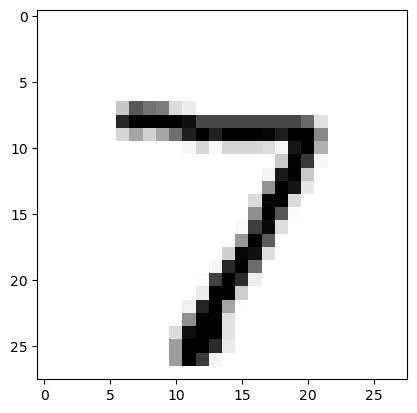

In [63]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, nb_classes -1)
print("Label:", tf.argmax(y_test[r:r+1], 1))
hypothesis, _ = compute_cost(x_test[r:r+1], y_test[r:r+1])
print("Prediction:", tf.argmax(hypothesis, 1))

plt.imshow(x_test[r:r+1].numpy().reshape(28, 28), cmap="Greys", interpolation="nearest")
